# Background

I decided to replicate the work cited here: [http://aqibsaeed.github.io/2016-09-03-urban-sound-classification-part-1/](http://aqibsaeed.github.io/2016-09-03-urban-sound-classification-part-1/) to understand how such a simple model yielded such good results, whereas our spectrogram techniques didnt. Sadly, I found out that the author intentionally mislead his readers. Why?:


The accuracy and loss quoted on the article are only obtained if you DO NOT follow the kfold validation suggested by the original Urban Sound researchers.

The blogger instead randomly assigns data from the same fold into the training/test datasets, which inevitable results in inflated accuracy scores. You can confirm this is the approach the author took by looking at his actual work on github: [https://github.com/aqibsaeed/Urban-Sound-Classification/blob/master/Urban Sound Classification using NN.ipynb](https://github.com/aqibsaeed/Urban-Sound-Classification/blob/master/Urban%20Sound%20Classification%20using%20NN.ipynb)

There it is clear that the loss curve he quotes was obtained by splitting based on the below

        

        labels = one_hot_encode(labels)
        train_test_split = np.random.rand(len(features)) < 0.70
        train_x = features[train_test_split]
        train_y = labels[train_test_split]
        test_x = features[~train_test_split]
        test_y = labels[~train_test_split]

           instead of what he quotes on the blog, where folds 1 and 2 are supposedly used as training, and 3 is used for test:

        parent_dir = 'Sound-Data'
        tr_sub_dirs = ["fold1","fold2"]
        ts_sub_dirs = ["fold3"]
        tr_features, tr_labels = parse_audio_files(parent_dir,tr_sub_dirs)
        ts_features, ts_labels = parse_audio_files(parent_dir,ts_sub_dirs)
        
        tr_labels = one_hot_encode(tr_labels)
        ts_labels = one_hot_encode(ts_labels)
        
Please note that the only modification to his original work was that I skipped extracting 6 out of the 193 features (librosa.feature.tonnetz) because of library compatibility issues. This does not materially impact the observations.

In [1]:
import glob
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
%matplotlib inline
plt.style.use('ggplot')

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 11
plt.rcParams['figure.titlesize'] = 13

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/cache.py:36: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if self.cachedir is not None:
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/cache.py:36: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if self.cachedir is not None:
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/cache.py:36: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if self.cachedir is not None:
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/cache.py:36: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if self.cachedir is not None:
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/cache.py:36: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if self.cachedir is not None:
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/cache.py:36: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if self.cachedir is not None:
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/

In [2]:
def load_sound_files(file_paths):
    raw_sounds = []
    for fp in file_paths:
        X,sr = librosa.load(fp)
        raw_sounds.append(X)
    return raw_sounds

def plot_waves(sound_names,raw_sounds):
    i = 1
    fig = plt.figure(figsize=(25,60), dpi = 900)
    for n,f in zip(sound_names,raw_sounds):
        plt.subplot(10,1,i)
        librosa.display.waveplot(np.array(f),sr=22050)
        plt.title(n.title())
        i += 1
    plt.suptitle('Figure 1: Waveplot',x=0.5, y=0.915,fontsize=18)
    plt.show()
    
def plot_specgram(sound_names,raw_sounds):
    i = 1
    fig = plt.figure(figsize=(25,60), dpi = 900)
    for n,f in zip(sound_names,raw_sounds):
        plt.subplot(10,1,i)
        specgram(np.array(f), Fs=22050)
        plt.title(n.title())
        i += 1
    plt.suptitle('Figure 2: Spectrogram',x=0.5, y=0.915,fontsize=18)
    plt.show()

def plot_log_power_specgram(sound_names,raw_sounds):
    i = 1
    fig = plt.figure(figsize=(25,60), dpi = 900)
    for n,f in zip(sound_names,raw_sounds):
        plt.subplot(10,1,i)
        D = librosa.logamplitude(np.abs(librosa.stft(f))**2, ref_power=np.max)
        librosa.display.specshow(D,x_axis='time' ,y_axis='log')
        plt.title(n.title())
        i += 1
    plt.suptitle('Figure 3: Log power spectrogram',x=0.5, y=0.915,fontsize=18)
    plt.show()

In [3]:
def extract_feature(file_name):
    X, sample_rate = librosa.load(file_name)
    stft = np.abs(librosa.stft(X))
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
    #tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate).T,axis=0)
    return mfccs,chroma,mel,contrast#,tonnetz

def parse_audio_files(parent_dir,sub_dirs,file_ext='*.wav'):
    features, labels = np.empty((0,187)), np.empty(0)
    for label, sub_dir in enumerate(sub_dirs):
        for fn in glob.glob(os.path.join(parent_dir, sub_dir, file_ext)):
            mfccs, chroma, mel, contrast = extract_feature(fn)
            ext_features = np.hstack([mfccs,chroma,mel,contrast])
            features = np.vstack([features,ext_features])
            labels = np.append(labels, fn.split('/')[7].split('-')[1])
    return np.array(features), np.array(labels, dtype = np.int)

def one_hot_encode(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels,n_unique_labels))
    one_hot_encode[np.arange(n_labels), labels] = 1
    return one_hot_encode

In [4]:
parent_dir = '/media/romulo/6237-3231/urban_sound_challenge/audio'
train_sub_dirs = ['fold1','fold2']
test_sub_dirs = ['fold3']
train_x, train_y = parse_audio_files(parent_dir,train_sub_dirs)
test_x, test_y = parse_audio_files(parent_dir,test_sub_dirs)

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float6

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidime

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float6

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float6

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float6

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float6

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float6

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float6

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float6

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float6

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:147: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will resu

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float6

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float6

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:147: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an 

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float6

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float6

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float6

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float6

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float6

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float6

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float6

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float6

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float6

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float6

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float6

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float6

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float6

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float6

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float6

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float6

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float6

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float6

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float6

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidime

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float6

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float6

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float6

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float6

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float6

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float6

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float6

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float6

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidime

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float6

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float6

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float6

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidime

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float6

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float6

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float6

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float6

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float6

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float6

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float6

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float6

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float6

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/util/utils.py:828: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/core/pitch.py:159: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  bins = np.linspace(-0.5, 0.5, np.ceil(1./resolution), endpoint=False)
/home/romulo/

In [5]:
train_y = one_hot_encode(train_y)
test_y = one_hot_encode(test_y)
"""
train_test_split = np.random.rand(len(features)) < 0.70
train_x = features[train_test_split]
train_y = labels[train_test_split]
test_x = features[~train_test_split]
test_y = labels[~train_test_split]
"""

'\ntrain_test_split = np.random.rand(len(features)) < 0.70\ntrain_x = features[train_test_split]\ntrain_y = labels[train_test_split]\ntest_x = features[~train_test_split]\ntest_y = labels[~train_test_split]\n'

In [6]:
import pandas as pd
df=pd.DataFrame({'x':list(train_x), 'y':list(train_y)})
df.to_json('train_folds_1to2_no3.json')
df=pd.DataFrame({'x':list(test_x), 'y':list(test_y)})
df.to_json('train_folds_3.json')

--------------------------------------------------------------------------------------------------------------------------

#### Training Neural Network with TensorFlow

In [17]:
import tensorflow as tf
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

In [26]:
training_epochs = 5000
n_dim = train_x.shape[1]
n_classes = 10
n_hidden_units_one = 280 
n_hidden_units_two = 300
sd = 1 / np.sqrt(n_dim)
learning_rate = 0.01

In [27]:
X = tf.placeholder(tf.float32,[None,n_dim])
Y = tf.placeholder(tf.float32,[None,n_classes])

W_1 = tf.Variable(tf.random_normal([n_dim,n_hidden_units_one], mean = 0, stddev=sd))
b_1 = tf.Variable(tf.random_normal([n_hidden_units_one], mean = 0, stddev=sd))
h_1 = tf.nn.tanh(tf.matmul(X,W_1) + b_1)


W_2 = tf.Variable(tf.random_normal([n_hidden_units_one,n_hidden_units_two], mean = 0, stddev=sd))
b_2 = tf.Variable(tf.random_normal([n_hidden_units_two], mean = 0, stddev=sd))
h_2 = tf.nn.sigmoid(tf.matmul(h_1,W_2) + b_2)


W = tf.Variable(tf.random_normal([n_hidden_units_two,n_classes], mean = 0, stddev=sd))
b = tf.Variable(tf.random_normal([n_classes], mean = 0, stddev=sd))
y_ = tf.nn.softmax(tf.matmul(h_2,W) + b)

init = tf.global_variables_initializer()

In [28]:
cost_function = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(y_), reduction_indices=[1])) 
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

correct_prediction = tf.equal(tf.argmax(y_,1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [29]:
cost_history = np.empty(shape=[1],dtype=float)
y_true, y_pred = None, None
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):            
        _,cost = sess.run([optimizer,cost_function],feed_dict={X:train_x,Y:train_y})
        cost_history = np.append(cost_history,cost)
    
    y_pred = sess.run(tf.argmax(y_,1),feed_dict={X: test_x})
    y_true = sess.run(tf.argmax(test_y,1))

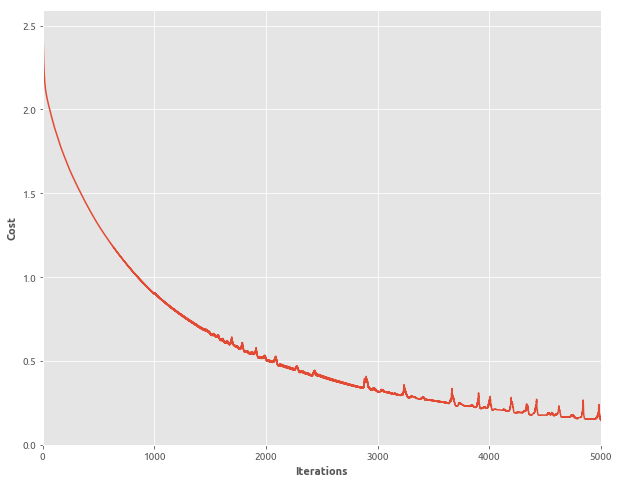

F-Score: 0.411


In [30]:
fig = plt.figure(figsize=(10,8))
plt.plot(cost_history)
plt.ylabel("Cost")
plt.xlabel("Iterations")
plt.axis([0,training_epochs,0,np.max(cost_history)])
plt.show()

p,r,f,s = precision_recall_fscore_support(y_true, y_pred, average='micro')
print("F-Score:", round(f,3))

# LOOK AT THE F SCORE AND THE ACCURACY SCORES - 40%

In [31]:
np.mean(y_true==y_pred)

0.41081081081081083

In [32]:
confusion_matrix(y_true, y_pred)

array([[ 1,  0, 22, 24,  1, 16,  0,  3,  0, 33],
       [ 0, 21,  0, 16,  5,  0,  0,  0,  0,  1],
       [ 0,  0, 57, 25,  0,  0,  0,  0,  0, 18],
       [ 0,  1, 13, 75,  3,  2,  0,  0,  0,  6],
       [ 0,  4,  3, 26, 39,  2, 10, 15,  0,  1],
       [18,  4,  4,  0,  0, 20,  0, 46,  0, 15],
       [ 0,  0,  0,  5,  4,  0, 15,  0,  0, 12],
       [ 5,  0,  0,  2, 48,  6,  0, 39,  0, 20],
       [ 3,  0,  6,  8,  0,  5,  2, 10, 72, 13],
       [ 1,  0, 30,  7, 12,  4,  0,  5,  0, 41]])

Confusion matrix, without normalization
[[ 1  0 22 24  1 16  0  3  0 33]
 [ 0 21  0 16  5  0  0  0  0  1]
 [ 0  0 57 25  0  0  0  0  0 18]
 [ 0  1 13 75  3  2  0  0  0  6]
 [ 0  4  3 26 39  2 10 15  0  1]
 [18  4  4  0  0 20  0 46  0 15]
 [ 0  0  0  5  4  0 15  0  0 12]
 [ 5  0  0  2 48  6  0 39  0 20]
 [ 3  0  6  8  0  5  2 10 72 13]
 [ 1  0 30  7 12  4  0  5  0 41]]
Normalized confusion matrix
[[0.01 0.   0.22 0.24 0.01 0.16 0.   0.03 0.   0.33]
 [0.   0.49 0.   0.37 0.12 0.   0.   0.   0.   0.02]
 [0.   0.   0.57 0.25 0.   0.   0.   0.   0.   0.18]
 [0.   0.01 0.13 0.75 0.03 0.02 0.   0.   0.   0.06]
 [0.   0.04 0.03 0.26 0.39 0.02 0.1  0.15 0.   0.01]
 [0.17 0.04 0.04 0.   0.   0.19 0.   0.43 0.   0.14]
 [0.   0.   0.   0.14 0.11 0.   0.42 0.   0.   0.33]
 [0.04 0.   0.   0.02 0.4  0.05 0.   0.33 0.   0.17]
 [0.03 0.   0.05 0.07 0.   0.04 0.02 0.08 0.61 0.11]
 [0.01 0.   0.3  0.07 0.12 0.04 0.   0.05 0.   0.41]]


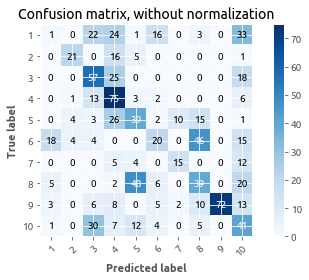

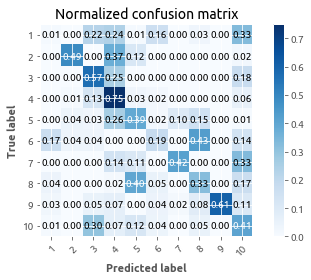

In [36]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# import some data to play with

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred,classes=range(1,11),
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, normalize=True,classes=range(1,11),
                      title='Normalized confusion matrix')

plt.show()